### <i> Forcasting Electric Vehicle Acoption in US Using Advanced MAchine Learning </i>
### <i> Import Library Files </i>

In [2]:
import pandas as pd
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [4]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205434,1N4BZ1CV2N,Chelan,Peshastin,WA,98847.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,12.0,187384494,POINT (-120.6051696 47.5510173),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
205435,1FTVW1EV0P,Snohomish,Everett,WA,98208.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,255036386,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,34.0,336983496,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,205436.000000,205439.000000,205431.000000,205431.000000,204997.000000,2.054390e+05,2.054360e+05
mean,98177.971870,2020.960363,52.164342,922.670532,28.970848,2.277156e+08,5.297704e+10
std,2419.037479,2.989059,88.075859,7761.753602,14.910052,7.205737e+07,1.588435e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.935324e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.382368e+08,5.303303e+10
75%,98372.000000,2023.000000,48.000000,0.000000,42.000000,2.618718e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


### <i> Data Preprocessing </i>

In [9]:
import pandas as pd
import numpy as np


# Basic info on initial data
print("Initial Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Handle Missing Values
# Drop rows with missing VIN, assuming it's crucial to identify vehicles
df.dropna(subset=['VIN (1-10)'], inplace=True)

# Fill missing categorical columns with "Unknown" to avoid issues in visualization
categorical_columns = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 
                       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility', 'Vehicle Location']
for col in categorical_columns:
    df[col].fillna("Unknown", inplace=True)

# Fill missing numerical columns with median to avoid data loss
numeric_columns = ['Postal Code', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract']
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Convert numeric columns that are categorical in nature to strings for easier plotting
df['Postal Code'] = df['Postal Code'].astype(str)
df['Legislative District'] = df['Legislative District'].astype(str)

# Check the dataset after preprocessing
print("\nData Info after Preprocessing:")
print(df.info())
print("\nSample Data:")
print(df.head())



Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              2054

### <i> Expolatory Data Analysis EDA </i>

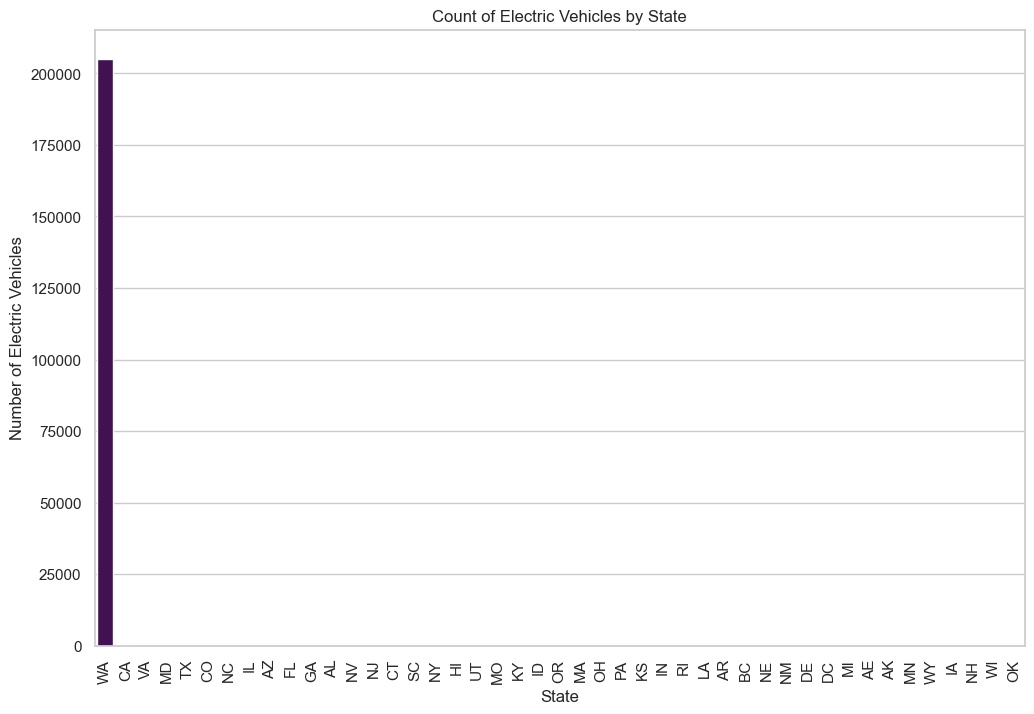

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# 1. Count of Electric Vehicles by State
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Count of Electric Vehicles by State")
plt.xlabel("State")
plt.ylabel("Number of Electric Vehicles")
plt.show()

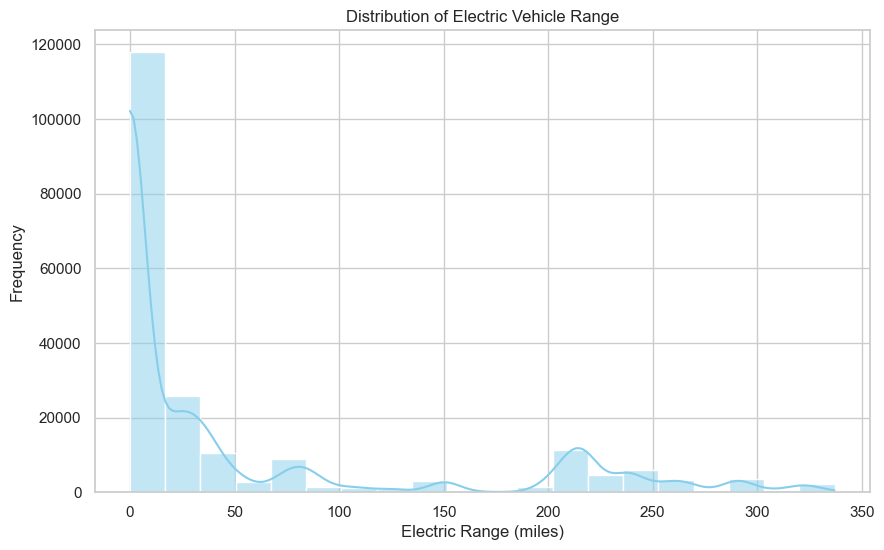

In [12]:
# 2. Distribution of Electric Vehicle Range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Electric Vehicle Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.show()

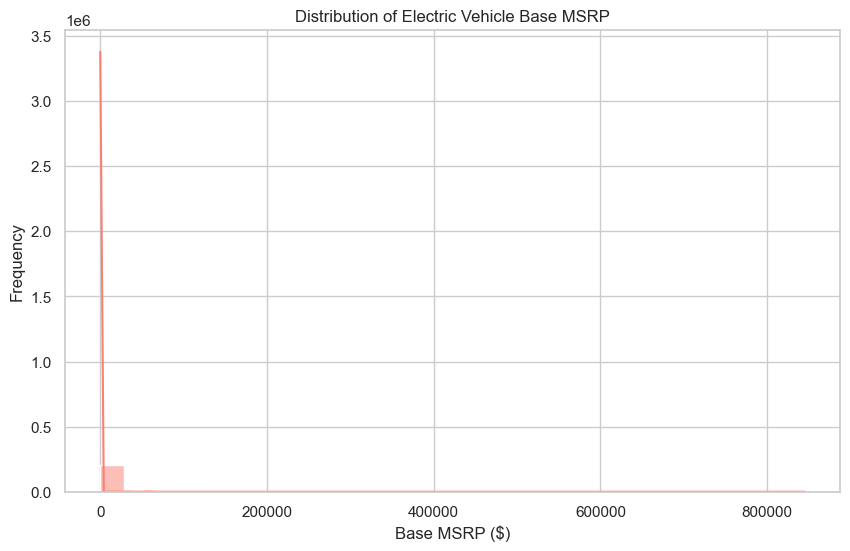

In [13]:
# 3. Distribution of Base MSRP
plt.figure(figsize=(10, 6))
sns.histplot(df['Base MSRP'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Electric Vehicle Base MSRP")
plt.xlabel("Base MSRP ($)")
plt.ylabel("Frequency")
plt.show()

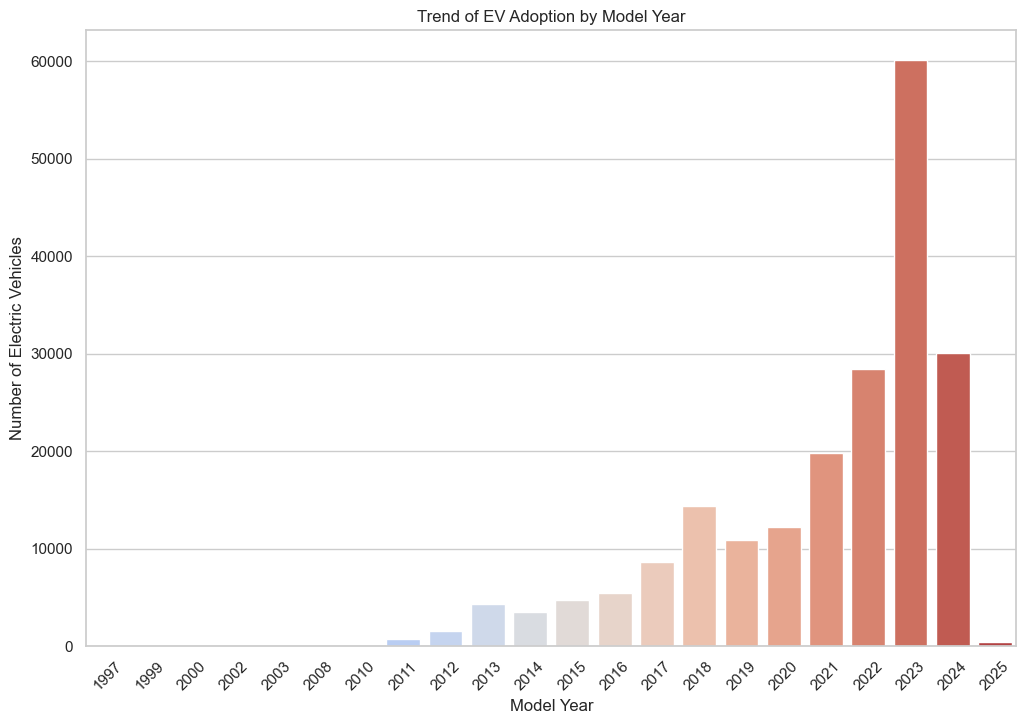

In [14]:
# 4. Trend of EV Adoption by Model Year
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Model Year', order=sorted(df['Model Year'].unique()), palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Trend of EV Adoption by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Electric Vehicles")
plt.show()


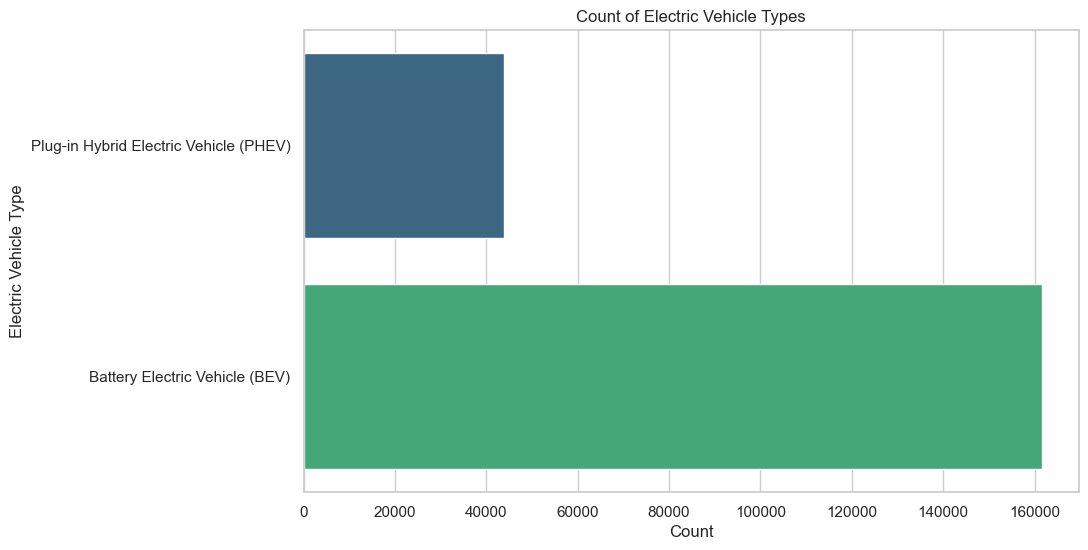

In [15]:
# 5. Count of Electric Vehicle Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Electric Vehicle Type', palette='viridis')
plt.title("Count of Electric Vehicle Types")
plt.xlabel("Count")
plt.ylabel("Electric Vehicle Type")
plt.show()

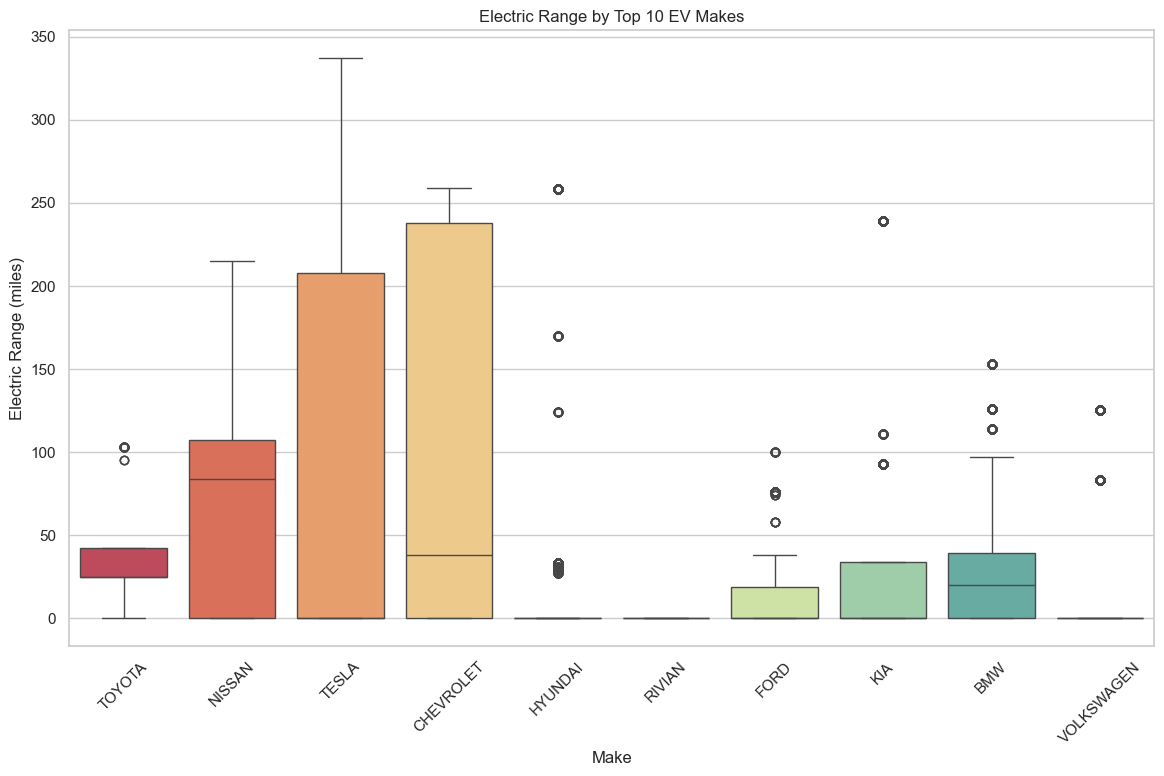

In [16]:
# 7. Electric Range by Make (Top 10 Makes with Most EVs)
top_10_makes = df['Make'].value_counts().index[:10]
df_top_makes = df[df['Make'].isin(top_10_makes)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_makes, x='Make', y='Electric Range', palette='Spectral')
plt.xticks(rotation=45)
plt.title("Electric Range by Top 10 EV Makes")
plt.xlabel("Make")
plt.ylabel("Electric Range (miles)")
plt.show()

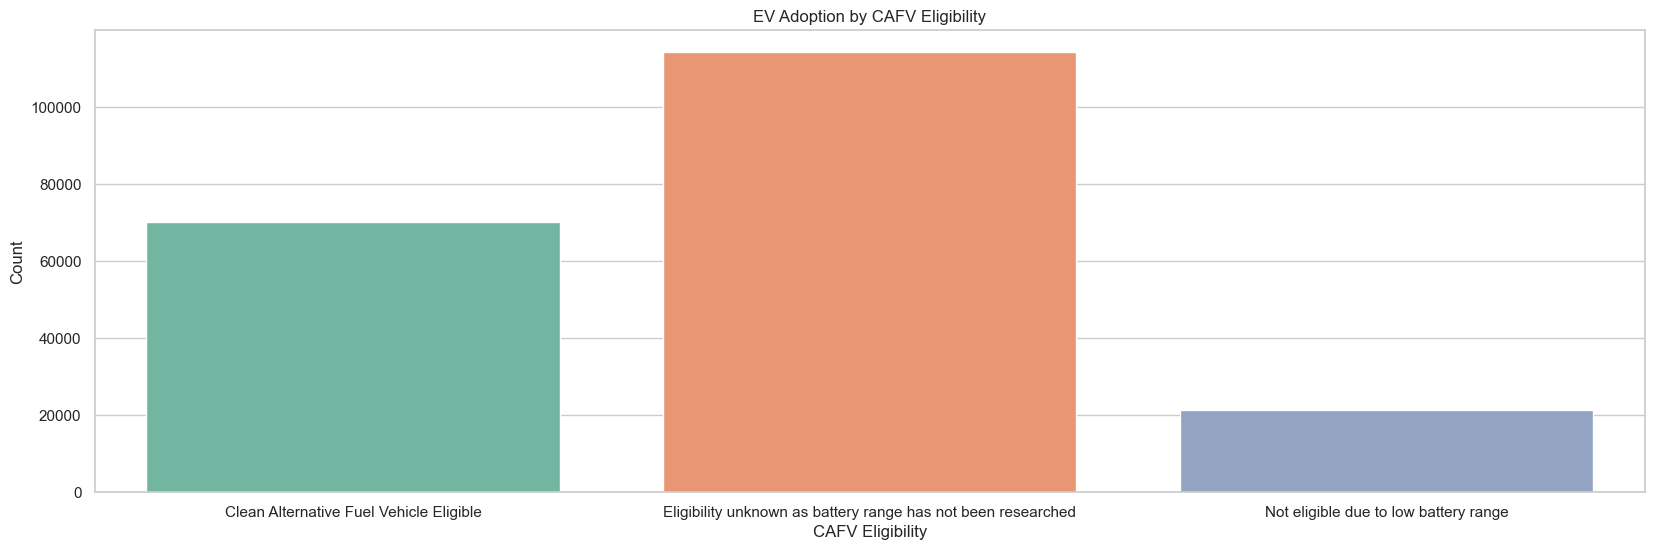

In [17]:
# 6. EV Adoption by Clean Alternative Fuel Vehicle (CAFV) Eligibility
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='Set2')
plt.title("EV Adoption by CAFV Eligibility")
plt.xlabel("CAFV Eligibility")
plt.ylabel("Count")
plt.show()

### <i> Model </i>
### <i> Linear Regression </i>

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy import sparse


# Selecting features and target variable
X = df.drop(columns=['Base MSRP'])  # Exclude target variable
y = df['Base MSRP']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Use OneHotEncoder with sparse_output=True to save memory
encoder = OneHotEncoder(sparse_output=True, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Combine the encoded categorical features with the rest of the numerical features
X_numerical = X.drop(columns=categorical_cols)
X_final = sparse.hstack((X_numerical.values, X_encoded))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression")
print("Mean Absolute Error:", mae_linear)
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared:", r2_linear)





Linear Regression
Mean Absolute Error: 1832.527119671623
Mean Squared Error: 57811216.69832495
Root Mean Squared Error: 7603.368773006144
R-squared: 0.0023020326463375484


### <i> Random Forest Regression </i>

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)



Random Forest Regressor
Mean Absolute Error: 20.277564008956386
Mean Squared Error: 791551.1515890893
Root Mean Squared Error: 889.6916047648698
R-squared: 0.9863395199046249


### <i> Gradient Boosting Regressor </i>

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)



Gradient Boosting Regressor
Mean Absolute Error: 519.9376065241349
Mean Squared Error: 6647668.83328287
Root Mean Squared Error: 2578.3073581873186
R-squared: 0.8852754523881387


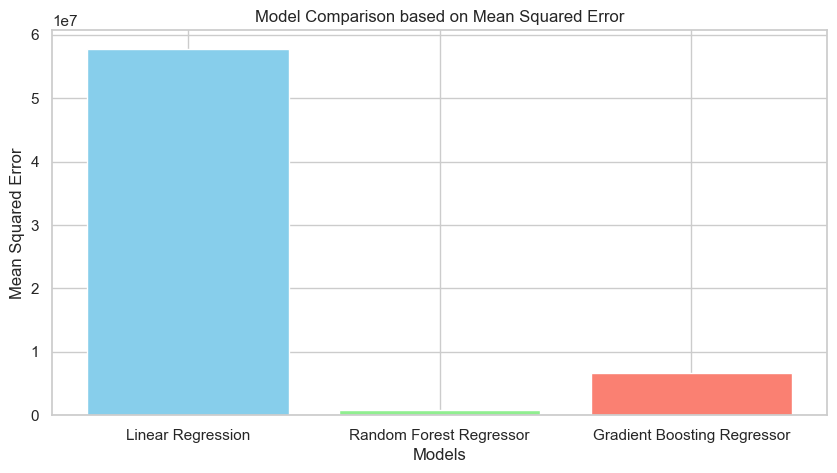

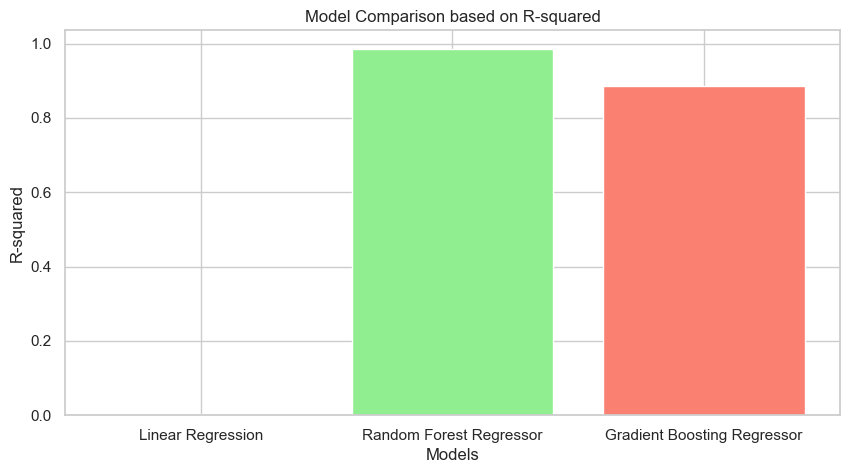

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor"]

# Mean Squared Errors and R-squared values
mse_scores = [mse_linear, mse_rf, mse_gb]
r2_scores = [r2_linear, r2_rf, r2_gb]

# Bar chart for Mean Squared Error
plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Comparison based on Mean Squared Error")
plt.ylabel("Mean Squared Error")
plt.xlabel("Models")
plt.show()

# Bar chart for R-squared
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Comparison based on R-squared")
plt.ylabel("R-squared")
plt.xlabel("Models")
plt.show()
